In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run 0_parameters.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

This notebook introduces the problem addressed in this paper:

 - localizating an object in a large image
 - foveation
 - action (saccade)
       
      
{'w': 28, 'minibatch_size': 100, 'train_batch_size': 50000, 'test_batch_size': 10000, 'noise_batch_size': 1000, 'mean': 0.1307, 'std': 0.3081, 'what_offset_std': 15, 'what_offset_max': 25, 'N_pic': 128, 'offset_std': 30, 'offset_max': 34, 'noise': 0.75, 'contrast': 0.7, 'sf_0': 0.1, 'B_sf': 0.1, 'do_mask': True, 'N_theta': 6, 'N_azimuth': 24, 'N_eccentricity': 10, 'N_phase': 2, 'rho': 1.41, 'bias_deconv': True, 'p_dropout': 0.0, 'dim1': 1000, 'dim2': 1000, 'lr': 0.005, 'do_adam': True, 'bn1_bn_momentum': 0.5, 'bn2_bn_momentum': 0.5, 'momentum': 0.3, 'epochs': 60, 'num_processes': 1, 'no_cuda': True, 'log_interval': 100, 'verbose': 1, 'filename': '../data/2020-07-01', 'seed': 2019, 'N_cv': 10, 'do_compute': True, 'save_model': True}
Overwriting tra

In [3]:
figname = '../figures/fig_methods_sup'

# Definition of the input and the output 

## Representation of input image (retina)

In [4]:
from display import Display
d = Display(args)

In [5]:
from retina import Retina
r = Retina(args)

In [6]:
data, label = next(iter(d.loader_test))
idx = 4
data_fullfield, i_offset, j_offset = d.draw(data[idx, 0, :, :].numpy())
data_retina = r.retina(data_fullfield)

In [7]:
#data_fullfield, i_offset, j_offset = d.draw(data[idx, 0, :, :].numpy(), noise=0, contrast=1)
#def place_object(data, i_offset, j_offset, im_noise=None, N_pic=128, contrast=1., noise=.5, sf_0=0.1, B_sf=0.1, do_mask=True, do_max=False):
from display import place_object
im_mnist = place_object(data[idx, 0, :, :], i_offset, j_offset, im_noise=None, N_pic=128, contrast=1., noise=0., sf_0=0.1, B_sf=0.1, do_mask=True, do_max=False)

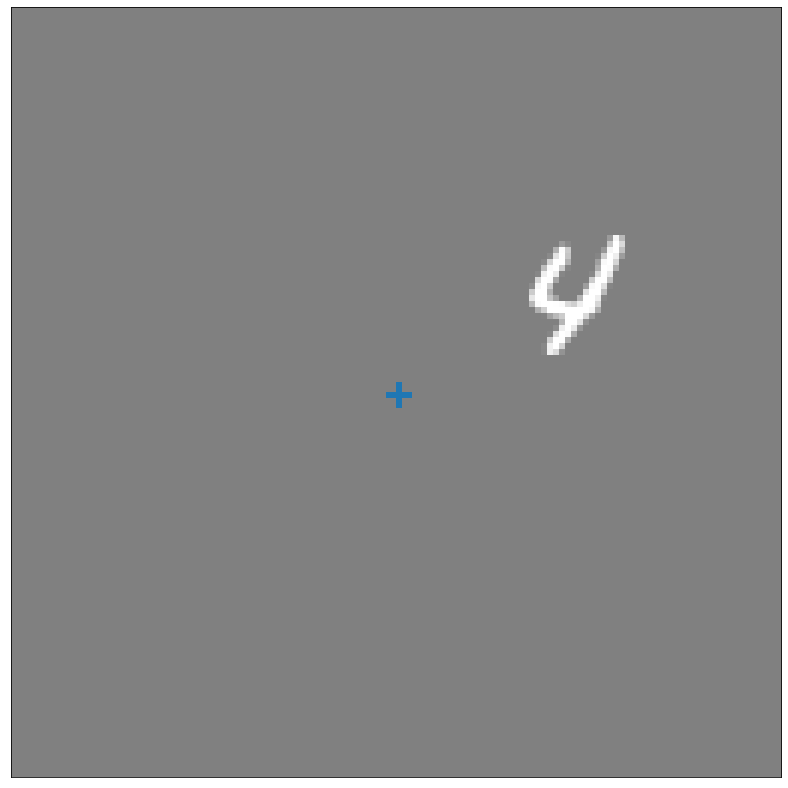

In [8]:
fig, axs = plt.subplots(1, 1, figsize = (figwidth, figwidth))
axs = d.show(axs, im_mnist)

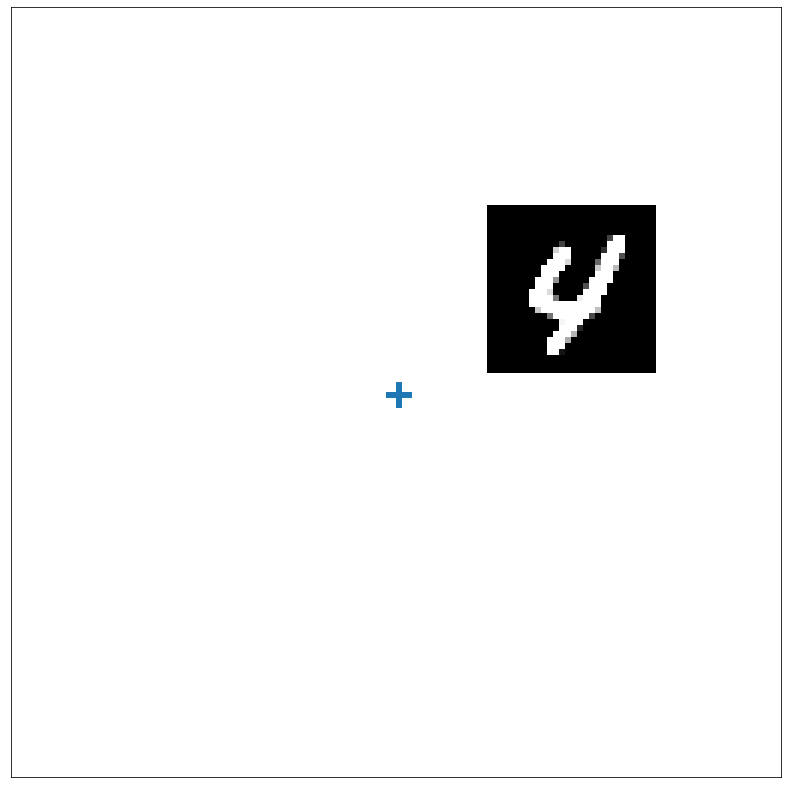

In [9]:
#data_fullfield, i_offset, j_offset = d.draw(data[idx, 0, :, :].numpy(), noise=0, contrast=1)
#def place_object(data, i_offset, j_offset, im_noise=None, N_pic=128, contrast=1., noise=.5, sf_0=0.1, B_sf=0.1, do_mask=True, do_max=False):
from display import do_offset
im_mnist = do_offset(data[idx, 0, :, :], i_offset=i_offset, j_offset=j_offset, N_pic=128, data_min=2.)

im_mnist[im_mnist==2.] *= np.nan

fig, axs = plt.subplots(1, 1, figsize = (figwidth, figwidth))
axs = d.show(axs, im_mnist)

In [10]:
from display import MotionCloudNoise
im_noise, _ = MotionCloudNoise(sf_0=args.sf_0, B_sf=args.B_sf)

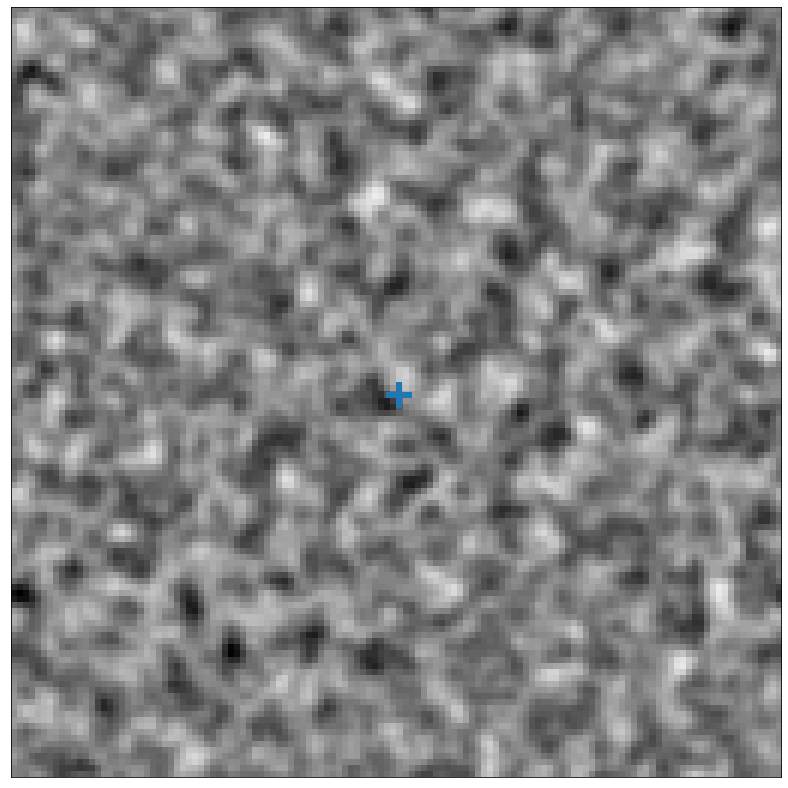

In [11]:
fig, axs = plt.subplots(1, 1, figsize = (figwidth, figwidth))
axs = d.show(axs, im_noise)

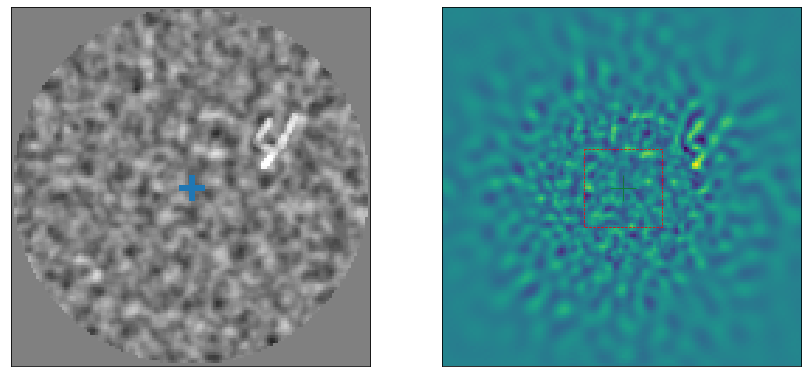

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (figwidth, figwidth/2))
axs[0] = d.show(axs[0], data_fullfield)
axs[1] = r.show(axs[1], r.retina_invert(data_retina))

In [13]:
axs[0]


https://stackoverflow.com/questions/30464117/plotting-a-imshow-image-in-3d-in-matplotlib#30465073

arrows = 
https://stackoverflow.com/questions/29188612/arrows-in-matplotlib-using-mplot3d

In [14]:
args.N_pic


128

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Arrow 
import numpy as np
from matplotlib import cm


class Arrow3D(Arrow):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        Arrow.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        Arrow.draw(self, renderer)
        

In [16]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


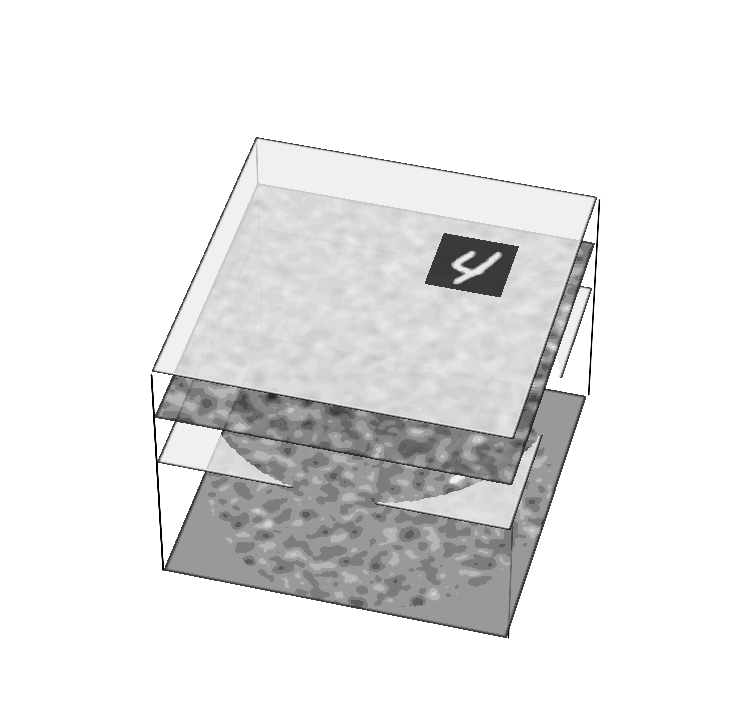

In [17]:
X, Y = np.meshgrid(np.arange(args.N_pic), np.arange(args.N_pic))
mask = np.ones_like(X) * .5
mask[(X-args.N_pic//2)**2 + (Y-args.N_pic//2)**2 <(args.N_pic//2)**2] *= np.nan
mask[0, 0] = 0
mask[127, 0] = 1

contour = np.ones_like(X) * 1.
contour[X==0] *= 0.
contour[X==args.N_pic-1] *= 0.
contour[Y==0] *= 0.
contour[Y==args.N_pic-1] *= 0.


#im_mnist = np.ones_like(X) * 1.
#im_mnist[(X-64)**2 + (Y-64)**2 > 8**2] *= np.nan

# create the figure
fig = plt.figure(figsize=(13, 13))

# show the 3D rotated projection
ax = fig.add_subplot(111, projection='3d')

layers = [0, .25, .35, .45]
N_q = 256
opts = dict(N=N_q, zdir='z', cmap=cm.gray, alpha=.8) # , vmin=-1, vmax=1.
aopts = dict(mutation_scale=20, arrowstyle='-|>', alpha=1., color='r') #,  fill=True, facecolor='b', edgecolor='g')
aopts = dict(alpha=1., color='k') #,  fill=True, facecolor='b', edgecolor='g')

a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
ax.add_artist(a)

# Hide grid lines
ax.grid(False)
ax.axis("off")
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

cset = ax.contourf(X, Y, data_fullfield.T*contour, offset=0., **opts)
#ax.plot_surface(X, Y, np.zeros_like(X), facecolors=plt.cm.gray( data_fullfield.T*contour))
cset = ax.contourf(X, Y, mask*contour, offset=layers[1], **opts)
cset = ax.contourf(X, Y, im_noise.T*contour, offset=layers[2], **opts)
cset = ax.contourf(X, Y, np.ones_like(contour)*contour, offset=max(layers), **opts)
cset = ax.contourf(X, Y, im_mnist.T*contour, offset=max(layers), **opts)

#ax2.plot_surface(X, Y, data_fullfield, rstride=1, cstride=1, facecolors=plt.cm.gray(data_fullfield), shade=False)
#ax2.imshow(X, Y, data_fullfield, rstride=1, cstride=1, facecolors=plt.cm.gray(data_fullfield), shade=False)
ax.set_zlim((0.,.6))

#a = Arrow3D([j_offset-14, j_offset-14], [i_offset-14, i_offset-14], [.6, .6], mutation_scale=20, arrowstyle='-|>', color='r')
a = Arrow3D([0]*2, [0]*2, [max(layers), 0], **aopts)
ax.add_artist(a)
a = Arrow3D([args.N_pic]*2, [args.N_pic]*2, [max(layers), 0], **aopts)
ax.add_artist(a)
a = Arrow3D([0]*2, [args.N_pic]*2, [max(layers), 0], **aopts)
ax.add_artist(a)
a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
ax.add_artist(a)
a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
ax.add_artist(a)
a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
ax.add_artist(a)

ax.view_init(elev=45., azim=15.)

In [18]:
help(ax.view_init)

Help on method view_init in module mpl_toolkits.mplot3d.axes3d:

view_init(elev=None, azim=None) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Set the elevation and azimuth of the axes in degrees (not radians).
    
    This can be used to rotate the axes programmatically.
    
    'elev' stores the elevation angle in the z plane (in degrees).
    'azim' stores the azimuth angle in the x,y plane (in degrees).
    
    if elev or azim are None (default), then the initial value
    is used which was specified in the :class:`Axes3D` constructor.



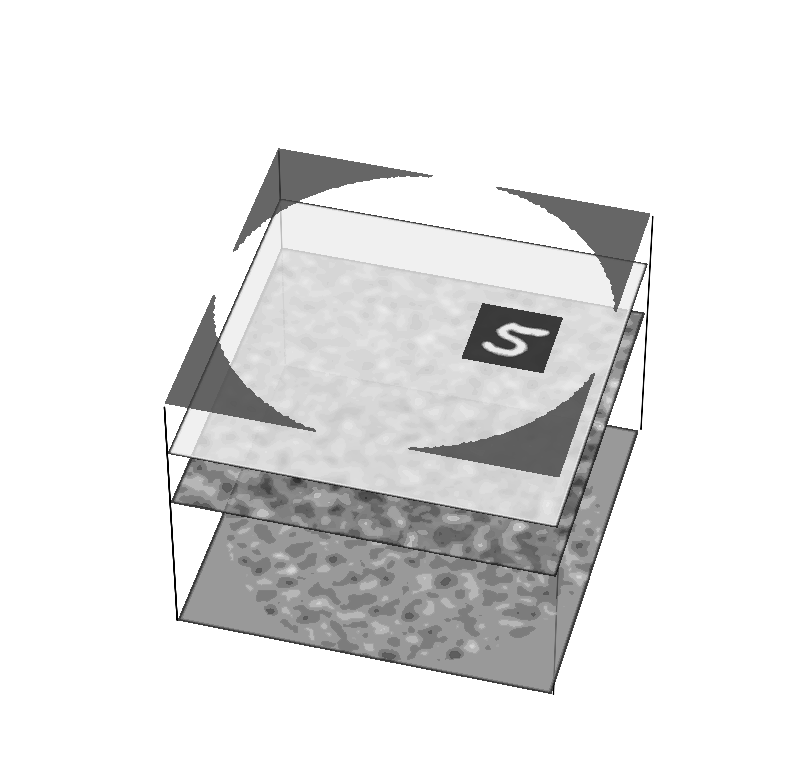

In [19]:
def panel_A(fig=None, ax=None):

    if fig is None:
        fig = plt.figure(figsize=(figwidth, figwidth))
        #fig, ax = plt.subplots(1, 1, figsize = (figwidth, figwidth))
    if ax is None:
        # show the 3D rotated projection
        ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(np.arange(args.N_pic), np.arange(args.N_pic))
    mask = np.ones_like(X) * .0
    mask[(X-args.N_pic//2)**2 + (Y-args.N_pic//2)**2 <(args.N_pic//2)**2] *= np.nan
    mask[0, 0] = -1
    mask[127, 0] = 1

    contour = np.ones_like(X) * 1.
    contour[X==0] *= 0.
    contour[X==args.N_pic-1] *= 0.
    contour[Y==0] *= 0.
    contour[Y==args.N_pic-1] *= 0.

    from display import MotionCloudNoise
    im_noise, _ = MotionCloudNoise(sf_0=args.sf_0, B_sf=args.B_sf)    
    data, label = next(iter(d.loader_test))
    idx = 4
    from display import do_offset
    im_mnist = do_offset(data[idx, 0, :, :], i_offset=i_offset, j_offset=j_offset, N_pic=128, data_min=2.)

    im_mnist[im_mnist==2.] *= np.nan

    #im_mnist = np.ones_like(X) * 1.
    #im_mnist[(X-64)**2 + (Y-64)**2 > 8**2] *= np.nan

    # show the 3D rotated projection
    ax = fig.add_subplot(111, projection='3d')
    
    layers = [0, .25, .35, .45]
    #a = Arrow3D([j_offset-14, j_offset-14], [i_offset-14, i_offset-14], [.6, .6], mutation_scale=20, arrowstyle='-|>', color='r')
    aopts = dict(mutation_scale=20, arrowstyle='-|>', alpha=1., color='r') #,  fill=True, facecolor='b', edgecolor='g')
    aopts = dict(alpha=1., color='k') #,  fill=True, facecolor='b', edgecolor='g')
    a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
    ax.add_artist(a)


    N_q = 256
    opts = dict(N=N_q, zdir='z', cmap=cm.gray, alpha=.8) # , vmin=-1, vmax=1.
    cset = ax.contourf(X, Y, data_fullfield.T*contour, offset=0., **opts)
    #ax.plot_surface(X, Y, np.zeros_like(X), facecolors=plt.cm.gray( data_fullfield.T*contour))
    cset = ax.contourf(X, Y, im_noise.T*contour, offset=layers[1], **opts)
    cset = ax.contourf(X, Y, np.ones_like(contour)*contour, offset=layers[2], **opts)
    cset = ax.contourf(X, Y, im_mnist.T*contour, offset=layers[2], **opts)
    cset = ax.contourf(X, Y, mask*contour, offset=layers[3], **opts)

    #ax2.plot_surface(X, Y, data_fullfield, rstride=1, cstride=1, facecolors=plt.cm.gray(data_fullfield), shade=False)
    #ax2.imshow(X, Y, data_fullfield, rstride=1, cstride=1, facecolors=plt.cm.gray(data_fullfield), shade=False)
    ax.set_zlim((0.,.6))

    a = Arrow3D([0]*2, [0]*2, [max(layers), 0], **aopts)
    ax.add_artist(a)
    a = Arrow3D([args.N_pic]*2, [args.N_pic]*2, [max(layers), 0], **aopts)
    ax.add_artist(a)
    a = Arrow3D([0]*2, [args.N_pic]*2, [max(layers), 0], **aopts)
    ax.add_artist(a)
    a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
    ax.add_artist(a)
    a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
    ax.add_artist(a)
    a = Arrow3D([args.N_pic]*2, [0]*2, [max(layers), 0], **aopts)
    ax.add_artist(a)        

    # Hide grid lines
    ax.grid(False)
    ax.axis("off")
    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(elev=45., azim=15.)
    
    return fig, ax
fig, ax = panel_A()

fig.savefig('/tmp/panel_A.pdf')

In [20]:
mask*contour

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0.5, ..., 0.5, 0.5, 0. ],
       [0. , 0.5, 0.5, ..., 0.5, 0.5, 0. ],
       ...,
       [0. , 0.5, 0.5, ..., 0.5, 0.5, 0. ],
       [0. , 0.5, 0.5, ..., 0.5, 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

## Representation of output accuracy (colliculus)

In [21]:
path = "../data/MNIST_accuracy.npy"
if os.path.isfile(path):
    accuracy_map =  np.load(path)
    if args.verbose:
        print('Loading accuracy... min, max=', accuracy_map.min(), accuracy_map.max())
else:
    print('No accuracy data found.')

Loading accuracy... min, max= 0.0145 0.9852


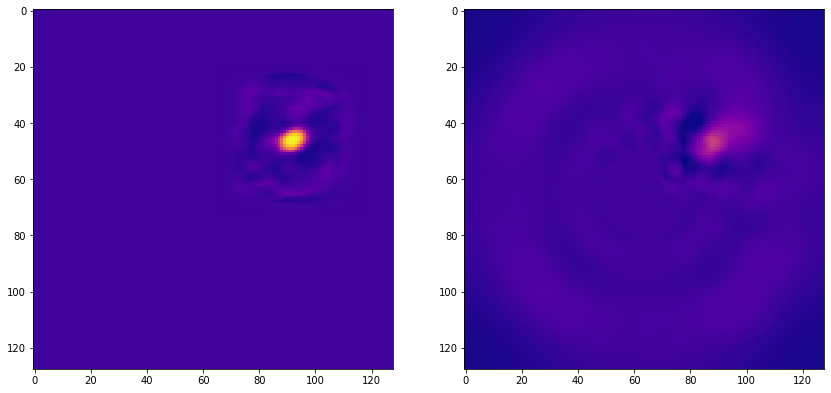

In [22]:
accuracy_colliculus, accuracy_fullfield_map = r.accuracy_fullfield(accuracy_map, i_offset, j_offset)

fig, axs = plt.subplots(1, 2, figsize = (figwidth, figwidth/2))
axs[0].imshow(accuracy_fullfield_map, vmin=0, vmax=1, cmap=plt.plasma())
axs[1].imshow(r.accuracy_invert(accuracy_colliculus), vmin=0, vmax=1, cmap=plt.plasma())
